# Color transform

In [2]:
import matplotlib.pyplot as plt
import cv2

| package | rgb <-> bgr                                                                                                                                               | rgb to gray                                                                                                                                                                                                                                    | gray to rgb                                                                                                                                                |
|---------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------|
| cv2     | import cv2<br>img_bgr = cv2.imread("xx.jpg")<br>cv_rgb = cv2.cvtColor(cv_bgr, cv2.COLOR_BGR2RGB)<br>cv_bgr = cv2.cvtColor(cv_rgb, cv2.COLOR_RGB2BGR)      | gray_img = cv2.cvtColor(cv_rgb, cv2.COLOR_RGB2GRAY)<br>gray_img = cv2.cvtColor(cv_bgr, cv2.COLOR_BGR2GRAY)<br><br># formula: `gray = (np.round(0.2989xR + 0.5870xG + 0.1140xB)).astype("uint8")`<br># data type: uint8; shape: (height, width) | gray_to_rgb = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR)<br><br># fromula: [gray_img, gray_img, gray_img]<br># data type: uint8; shape: (height, width, 3) |
| skimage |                                                                                                                                                           | import matplotlib.pyplot as plt<br>from skimage import color<br><br>img_rgb = plt.imread("xx.jpg")<br>img_gray = color.rgb2gray(rocket_image)<br># data type: uint8; shape: (height, width)                                                    |                                                                                                                                                            |
| plt     | import matplotlib.pyplot as plt<br>import numpy as np<br><br>img_rgb = plt.imread("xx.jpg")<br>img_bgr = img_rgb[:,:,::-1]<br>img_rgb = img_bgr[:,:,::-1] |                                                                                                                                                                                                                                                |                                                                                                                                                            |

## RGB 與 BGR 轉換

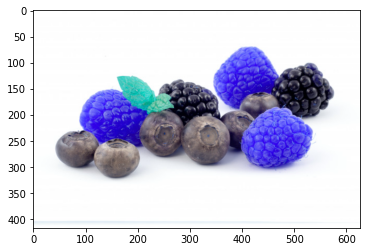

In [4]:
cv_bgr = cv2.imread("imgs/fruits-2.jpg")

plt.imshow(cv_bgr);

* 可以看到，這張圖跟我想的不一樣，藍色的地方，本來應該是紅色的。這是因為讀進來時，預設是 BGR 的通道
* 我們可以透過 cv2 的 `cvtColor()` 來轉換，例如：

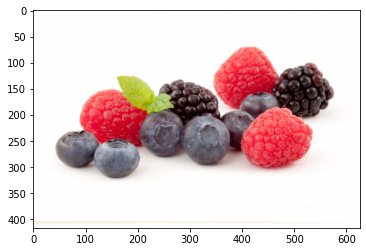

In [6]:
cv_rgb = cv2.cvtColor(cv_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(cv_rgb);

* 也可以轉回來

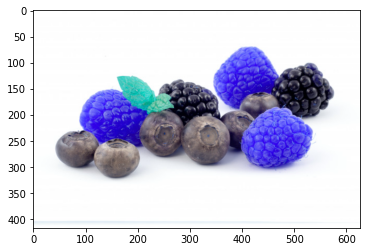

In [7]:
cv_bgr = cv2.cvtColor(cv_rgb, cv2.COLOR_RGB2BGR)
plt.imshow(cv_bgr);

* 也可以不要用 function，就用 array 的特性來改就好

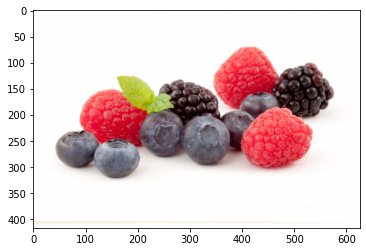

In [8]:
cv_rgb = cv_bgr[:,:,::-1]
plt.imshow(cv_rgb);

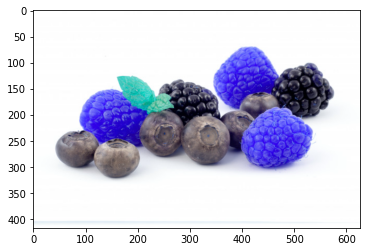

In [9]:
cv_bgr = cv_rgb[:,:,::-1]
plt.imshow(cv_bgr);

## 彩色轉灰階

* cv2 的彩色轉灰階的公式為： `gray = (np.round(0.2989xR + 0.5870xG + 0.1140xB)).astype("uint8")`  
* 可以看到，他給三個通道不同的權重，以G通道最多，再來是R，最後是B。而且算完後，會先四捨五入，再轉成 uint8 (0~255無號整數)
* 用 cv2 的 function，就可以把 RGB轉灰階，或 BGR 轉灰階，如下：

The data type of image is : uint8
The shape of image is : (417, 626)


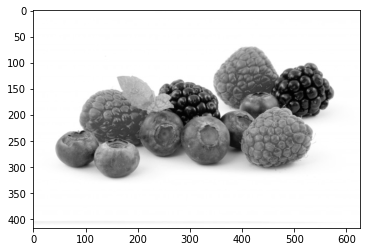

In [38]:
gray_img = cv2.cvtColor(cv_rgb, cv2.COLOR_RGB2GRAY)
print(f"The data type of image is : {gray_img.dtype}")
print(f"The shape of image is : {gray_img.shape}")
plt.imshow(gray_img, cmap = "gray");

* 可以看到，轉成灰階後，通道被拿掉了

* 再來看看，BGR 轉灰階，作法一樣：

The data type of image is : uint8
The shape of image is : (417, 626)


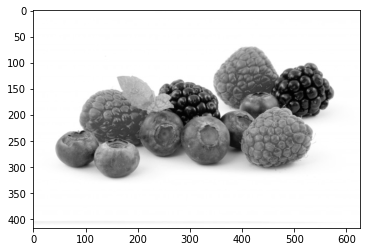

In [39]:
gray_img = cv2.cvtColor(cv_bgr, cv2.COLOR_BGR2GRAY)
print(f"The data type of image is : {gray_img.dtype}")
print(f"The shape of image is : {gray_img.shape}")
plt.imshow(gray_img, cmap = "gray");

* 自己用公式來轉也可以

The data type of image is : uint8
The shape of image is : (417, 626)


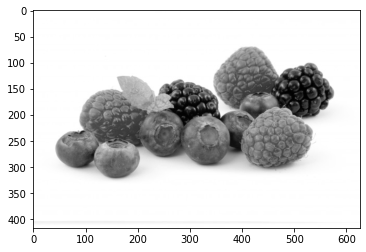

In [45]:
def my_rgb_to_gray(rgb_img):
    r = rgb_img[:,:,0]
    g = rgb_img[:,:,1]
    b = rgb_img[:,:,2]
    gray = 0.2989*r + 0.5870*g + 0.1140*b
    gray = np.round(gray)
    return gray.astype("uint8")

gray_img2 = my_rgb_to_gray(cv_rgb)
print(f"The data type of image is : {gray_img2.dtype}")
print(f"The shape of image is : {gray_img2.shape}")
plt.imshow(gray_img2, cmap = "gray");

* 如果用 `skimage`，就這樣做：

The data type of image is : uint8
The shape of image is : (417, 626)


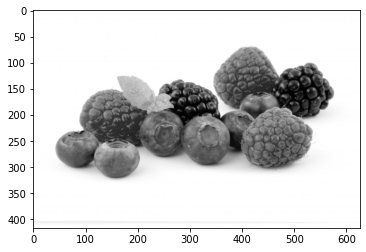

In [51]:
import matplotlib.pyplot as plt
from skimage import color

img_rgb = plt.imread("imgs/fruits-2.jpg")
img_gray = color.rgb2gray(img_rgb)

print(f"The data type of image is : {gray_img.dtype}")
print(f"The shape of image is : {img_gray.shape}")
plt.imshow(img_gray, cmap = "gray");

* 可以看到，shape也是把通道拿掉了。但轉換公式沒查，不確定是不是和 cv2 一樣

## 灰階轉彩色(新增通道)

* open cv 的轉換公式為：color image = [gray_img, gray_img, gray_img]
* 所以，就是灰階影像，幫你重複三次
* 要注意的是，原本的 gray_img 要是 `uint8` 的 data type，如果不是，要先幫他轉一下

The shape of image is : (417, 626, 3)


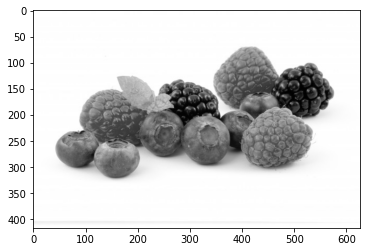

In [52]:
gray_to_rgb = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR)
print(f"The shape of image is : {gray_to_rgb.shape}")
plt.imshow(gray_to_rgb);

## 其他應用

* opencv 的書 (CH4-3~4-7) 還有很多內容，這等之後再整理了
  * 4-3: HSV 色彩空間, BGR/RGB <-> HSV
  * 4-4: 拆分 channel
  * 4-5: 合併 channel
  * 4-6: 拆分與合併 channel 的應用 (色調 Hue 調整, 飽和 Saturation 調整, 明度 Value 調整)
  * 4-7: alpha 通道